In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kaplanmeier as km

In [2]:
df = pd.read_csv('/Users/sergal/Documents/survival/lymphoma.csv', sep=',')
df.head()

,_id,cohorts.0.id,cohorts.0.label,dataUseConditions.id,dataUseConditions.label,description,externalReferences.0.id,externalReferences.0.label,histologicalDiagnosis.id,histologicalDiagnosis.label,...,info.samplesource,info.seer,info.cellLine,tumorGrade.id,tumorGrade.label,ageAtCollection.age,ageAtCollection.ageClass.id,ageAtCollection.ageClass.label,projectId,sex
0,5bab56c2727983b2e00abd59,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,refractory cytopenia with multilineage dysplas...,PMID:20645416,"Mackinnon RN, Selan C et al. (2010): The parad...",NCIT:C27753,Acute Myeloid Leukemia Not Otherwise Specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
1,5bab56c2727983b2e00abd5b,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,acute myeloid leukemia [erythroleukemia],PMID:20645416,"Mackinnon RN, Selan C et al. (2010): The parad...",NCIT:C27753,Acute Myeloid Leukemia Not Otherwise Specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
2,5bab56c1727983b2e00ab69c,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,acute panmyelosis with myelofibrosis,PMID:22682625,"Grygalewicz B, Woroniecka R et al. (2012): Acu...",NCIT:C27753,Acute Myeloid Leukemia Not Otherwise Specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
3,5bab56c1727983b2e00ab852,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,Acute myeloid leukemia,PMID:21965128,"Gotou M, Hanamura I et al. (2012): Establishme...",NCIT:C27753,Acute Myeloid Leukemia Not Otherwise Specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
4,5c86623709d374f2dc3e1a2c,pgxcohort-arraymap,arrayMap collection,DUO:0000004,no restriction,Acute myeloid leukemia,geo:GSE23452,NaN,NCIT:C27753,Acute Myeloid Leukemia Not Otherwise Specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['_id', 'cohorts.0.id', 'cohorts.0.label', 'dataUseConditions.id',
       'dataUseConditions.label', 'description', 'externalReferences.0.id',
       'externalReferences.0.label', 'histologicalDiagnosis.id',
       'histologicalDiagnosis.label', 'icdoMorphology.id',
       'icdoMorphology.label', 'icdoTopography.id', 'icdoTopography.label',
       'id', 'individualAgeAtCollection', 'individualId', 'info.callsetIds.0',
       'info.cnvstatistics.cnvcoverage', 'info.cnvstatistics.cnvfraction',
       'info.cnvstatistics.delcoverage', 'info.cnvstatistics.delfraction',
       'info.cnvstatistics.dupcoverage', 'info.cnvstatistics.dupfraction',
       'info.legacyId.0', 'pathologicalStage',
       'provenance.geoLocation.geometry.coordinates.0',
       'provenance.geoLocation.geometry.coordinates.1',
       'provenance.geoLocation.geometry.type',
       'provenance.geoLocation.properties.ISO3166alpha3',
       'provenance.geoLocation.properties.city',
       'provenance.geoLocation.pro

In [ ]:
columns = ['description', 'histologicalDiagnosis.id', 'histologicalDiagnosis.label', 'info.death', 'info.followupMonths', 'sex', 'id', 'sampledTissue.label']
df_small = df[columns]
df_small

In [5]:
df_categories = df_small['histologicalDiagnosis.label'].value_counts()
df_categories

histologicalDiagnosis.label
Diffuse Large B-Cell Lymphoma, Not Otherwise Specified                 325
Mantle Cell Lymphoma                                                   125
Chronic Lymphocytic Leukemia                                            89
Acute Lymphoblastic Leukemia                                            87
Diffuse Large B-Cell Lymphoma                                           53
Splenic Marginal Zone Lymphoma                                          42
Primary Cutaneous CD30-Positive T-Cell Lymphoproliferative Disorder     40
Peripheral T-Cell Lymphoma, Not Otherwise Specified                     34
Mycosis Fungoides                                                       30
Acute Myeloid Leukemia Not Otherwise Specified                          21
Anaplastic Large Cell Lymphoma                                          18
Acute Myeloid Leukemia with Maturation                                  11
Follicular Lymphoma                                                     

In [6]:
# Import samples with TP53 deletion
tp53_del = pd.read_csv('/Users/sergal/Documents/survival/biosamples_TP53_deletion.txt', sep='\t')
tp53_del

,biosample_id,group_id,group_label,individual_id,callset_ids,external_references_id___PMID,external_references_label___PMID,external_references_id___arrayexpress,external_references_label___arrayexpress,external_references_id___cbioportal,...,geoprov_long_lat,cnv_fraction,cnv_del_fraction,cnv_dup_fraction,cell_line,experiment_id,series_id,platform_id,cell_line_id,cell_line_label
0,pgxbs-kftva5am,NaN,NaN,pgxind-kftx25fa,pgxcs-kftvldzm,NaN,NaN,NaN,NaN,NaN,...,-123.12::49.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pgxbs-kftva5au,NaN,NaN,pgxind-kftx25fk,pgxcs-kftvle20,NaN,NaN,NaN,NaN,NaN,...,-123.12::49.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pgxbs-kftva5b3,NaN,NaN,pgxind-kftx25fu,pgxcs-kftvle4d,NaN,NaN,NaN,NaN,NaN,...,-123.12::49.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pgxbs-kftva5be,NaN,NaN,pgxind-kftx25g8,pgxcs-kftvle7p,NaN,NaN,NaN,NaN,NaN,...,-123.12::49.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pgxbs-kftva5c3,NaN,NaN,pgxind-kftx25h3,pgxcs-kftvleew,NaN,NaN,NaN,NaN,NaN,...,-123.12::49.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,pgxbs-l08ailus,NaN,NaN,pgxind-l08ailus,NaN,PMID:20620600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2363,pgxbs-l08ailyf,NaN,NaN,pgxind-l08ailyf,NaN,PMID:20620600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2364,pgxbs-l08ainhb,NaN,NaN,pgxind-l08ainhb,NaN,PMID:20620600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2365,pgxbs-l08ainis,NaN,NaN,pgxind-l08ainis,NaN,PMID:20620600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#extract indices of samples with TP53 deletion
ids_tp53_del = list(tp53_del.biosample_id)
len(ids_tp53_del)

2367

In [8]:
#Import samples with TP53 gain
tp53_gain = pd.read_csv('/Users/sergal/Documents/survival/biosamples_TP53_gain', sep='\t')
tp53_gain

,biosample_id,group_id,group_label,individual_id,callset_ids,external_references_id___PMID,external_references_label___PMID,external_references_id___arrayexpress,external_references_label___arrayexpress,external_references_id___cbioportal,...,geoprov_long_lat,cnv_fraction,cnv_del_fraction,cnv_dup_fraction,cell_line,experiment_id,series_id,platform_id,cell_line_id,cell_line_label
0,pgxbs-kftva5ak,NaN,NaN,pgxind-kftx25f8,pgxcs-kftvldz5,NaN,NaN,NaN,NaN,NaN,...,-123.12::49.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pgxbs-kftva5vb,NaN,NaN,pgxind-kftx2614,pgxcs-kftvlh59,PMID:9830797,NaN,NaN,NaN,NaN,...,24.94::60.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pgxbs-kftva5vc,NaN,NaN,pgxind-kftx2616,pgxcs-kftvlh5r,PMID:9830797,NaN,NaN,NaN,NaN,...,24.94::60.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pgxbs-kftva5ve,NaN,NaN,pgxind-kftx2618,pgxcs-kftvlh69,PMID:9830797,NaN,NaN,NaN,NaN,...,24.94::60.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pgxbs-kftva5vu,NaN,NaN,pgxind-kftx261s,pgxcs-kftvlhb3,PMID:9830797,NaN,NaN,NaN,NaN,...,24.94::60.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,pgxbs-l08aimuv,NaN,NaN,pgxind-l08aimuv,NaN,PMID:9766511,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,pgxbs-l08aimvn,NaN,NaN,pgxind-l08aimvn,NaN,PMID:9766511,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,pgxbs-l08aimwf,NaN,NaN,pgxind-l08aimwf,NaN,PMID:9766511,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,pgxbs-l08aindo,NaN,NaN,pgxind-l08aindo,NaN,PMID:18190236,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Extract samples indices of TP53 gain
ids_tp53_gain = list(tp53_gain.biosample_id)
len(ids_tp53_gain)

1013

In [10]:
# add new column to survival dataframe regarding CNV status TP53
df_small['TP53_CN'] = np.where(df_small['id'].isin(ids_tp53_del), 'del', np.where(df_small['id'].isin(ids_tp53_gain), 'gain', 'normal'))
df_small

/var/folders/v4/74gnnjyd7619513_zdpvp3ddchwjyp/T/ipykernel_9504/1387264696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['TP53_CN'] = np.where(df_small['id'].isin(ids_tp53_del), 'del', np.where(df_small['id'].isin(ids_tp53_gain), 'gain', 'normal'))


,description,histologicalDiagnosis.id,histologicalDiagnosis.label,info.death,info.followupMonths,sex,id,sampledTissue.label,TP53_CN
0,refractory cytopenia with multilineage dysplas...,NCIT:C27753,Acute Myeloid Leukemia Not Otherwise Specified,0,5.0,M,pgxbs-kftvgmrz,bone marrow,normal
1,acute myeloid leukemia [erythroleukemia],NCIT:C27753,Acute Myeloid Leukemia Not Otherwise Specified,0,11.0,M,pgxbs-kftvgms2,bone marrow,del
2,acute panmyelosis with myelofibrosis,NCIT:C27753,Acute Myeloid Leukemia Not Otherwise Specified,1,2.6,M,pgxbs-kftvgklf,bone marrow,del
3,Acute myeloid leukemia,NCIT:C27753,Acute Myeloid Leukemia Not Otherwise Specified,1,3.0,M,pgxbs-kftvgl5c,bone marrow,normal
4,Acute myeloid leukemia,NCIT:C27753,Acute Myeloid Leukemia Not Otherwise Specified,1,14.2,NaN,pgxbs-kftviwvv,bone marrow,normal
...,...,...,...,...,...,...,...,...,...
921,Diffuse large B-cell lymphoma [cutaneous],NCIT:C8851,Diffuse Large B-Cell Lymphoma,1,38.0,F,pgxbs-kftvh3pq,zone of skin,normal
922,Diffuse large B-cell lymphoma [cutaneous],NCIT:C8851,Diffuse Large B-Cell Lymphoma,1,18.0,F,pgxbs-kftvh3ps,zone of skin,normal
923,Diffuse large B-cell lymphoma [cutaneous],NCIT:C8851,Diffuse Large B-Cell Lymphoma,1,35.0,M,pgxbs-kftvh3pu,zone of skin,normal
924,Diffuse large B-cell lymphoma [cutaneous],NCIT:C8851,Diffuse Large B-Cell Lymphoma,1,35.0,M,pgxbs-kftvh3pv,zone of skin,gain


In [11]:
df_small['TP53_CN'].value_counts()

TP53_CN
normal    787
del       122
gain       17
Name: count, dtype: int64

In [12]:
df_small.columns

Index(['description', 'histologicalDiagnosis.id',
       'histologicalDiagnosis.label', 'info.death', 'info.followupMonths',
       'sex', 'id', 'sampledTissue.label', 'TP53_CN'],
      dtype='object')

In [13]:
df_TP53_deletions = df_small[df_small['TP53_CN']== 'del']
df_TP53_deletions['histologicalDiagnosis.label'].value_counts()

histologicalDiagnosis.label
Diffuse Large B-Cell Lymphoma, Not Otherwise Specified                 60
Mantle Cell Lymphoma                                                   20
Chronic Lymphocytic Leukemia                                           11
Mycosis Fungoides                                                       6
Peripheral T-Cell Lymphoma, Not Otherwise Specified                     6
Primary Cutaneous CD30-Positive T-Cell Lymphoproliferative Disorder     5
Acute Myeloid Leukemia Not Otherwise Specified                          4
Acute Lymphoblastic Leukemia                                            4
Diffuse Large B-Cell Lymphoma                                           3
Sezary Syndrome                                                         2
Splenic Marginal Zone Lymphoma                                          1
Name: count, dtype: int64

In [26]:
#results = km.fit(df_small.info.followupMonths, df_small.info.death, df_small.TP53_CN)
df_km = df_small[df_small['info.followupMonths'].notna()]
df_km_cll = df_km[df_km['histologicalDiagnosis.label'] == 'Chronic Lymphocytic Leukemia']
df_km_dlbcl = df_km[df_km['histologicalDiagnosis.label'] == 'Diffuse Large B-Cell Lymphoma, Not Otherwise Specified']
df_km_mcl = df_km[df_km['histologicalDiagnosis.label'] == 'Mantle Cell Lymphoma']
time_event = df_km['info.followupMonths']
time_event_cll = df_km_cll['info.followupMonths']
time_event_dlbcl = df_km_dlbcl['info.followupMonths']
time_event_mcl = df_km_mcl['info.followupMonths']
censoring = df_km['info.death']
censoring_cll = df_km_cll['info.death']
censoring_dlbcl = df_km_dlbcl['info.death']
censoring_mcl = df_km_mcl['info.death']
y = df_km['TP53_CN']
y_cll = df_km_cll['TP53_CN']
y_dlbcl = df_km_dlbcl['TP53_CN']
y_mcl = df_km_mcl['TP53_CN']
results = km.fit(time_event, censoring, y)
results_cll = km.fit(time_event_cll, censoring_cll, y_cll)
results_dlbcl = km.fit(time_event_dlbcl, censoring_dlbcl, y_dlbcl)
results_mcl = km.fit(time_event_mcl, censoring_mcl, y_mcl)

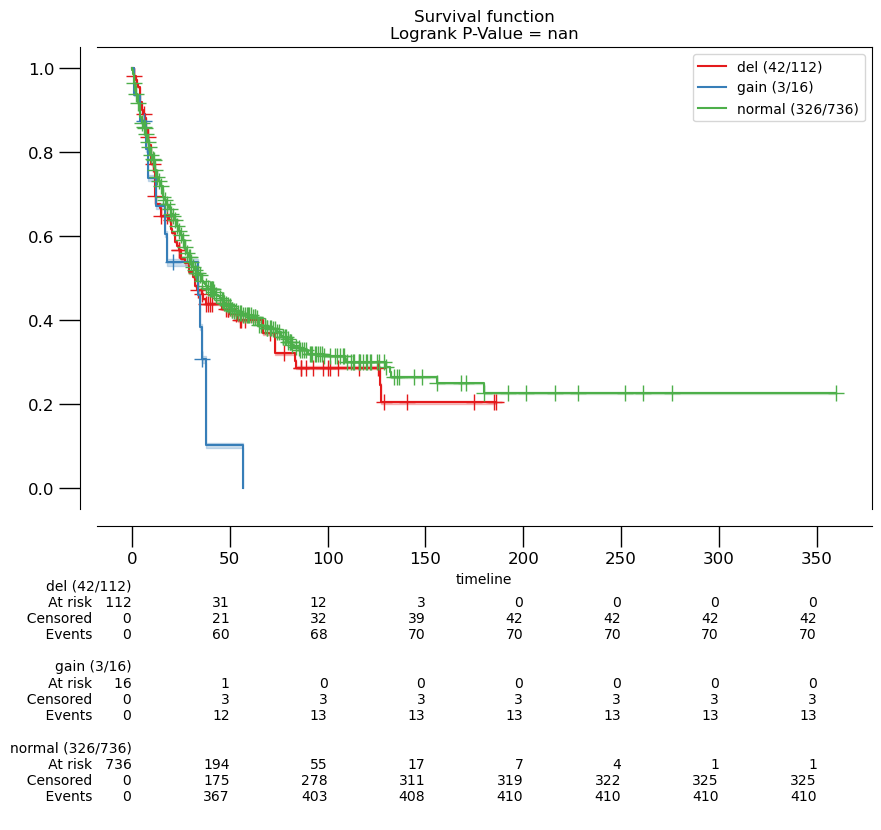

In [20]:
km.plot(results)

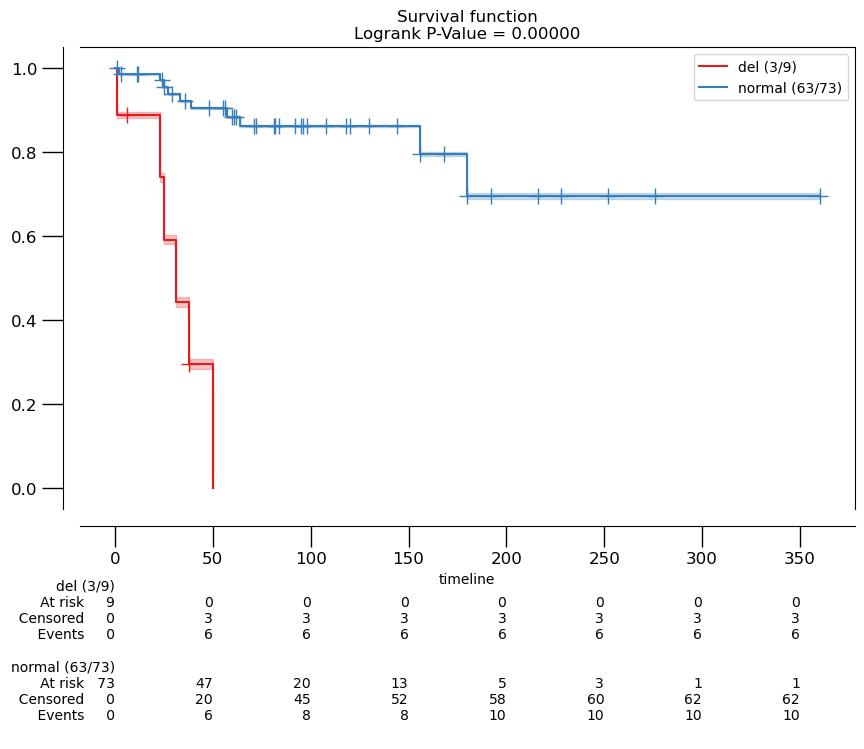

In [22]:
km.plot(results_cll)

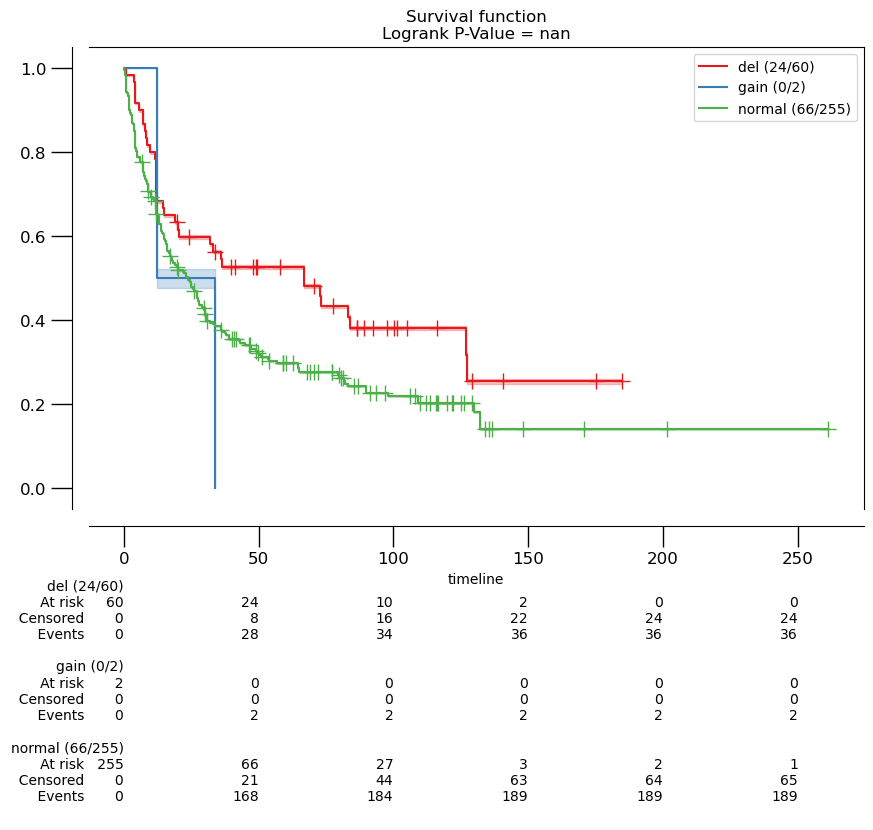

In [25]:
km.plot(results_dlbcl)

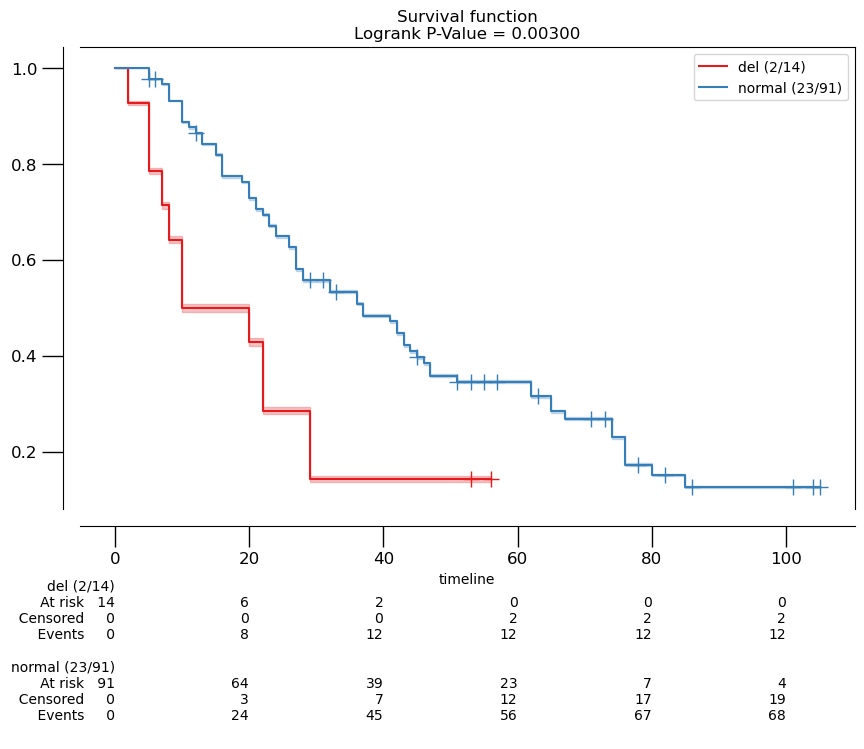

In [27]:
km.plot(results_mcl)

In [19]:
df_small.columns

Index(['description', 'histologicalDiagnosis.id',
       'histologicalDiagnosis.label', 'info.death', 'info.followupMonths',
       'sex', 'id', 'sampledTissue.label', 'TP53_CN'],
      dtype='object')

In [ ]:
df_small['info.followupMonths']

In [ ]:
df_small

In [ ]:
time_event[time_event.isna()]